# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#
#
#placeholder for future dependencies

In [3]:
#config variables (aka constants)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
api_key = weather_api_key  #changing name to make it shorter.  The prefix is needed in the config file to distinguish from other keys

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [5]:
city = 'London' 
#query_url = url + "appid=" + api_key + "&q=" + city + "&units="+units
query_url = f'{url}appid={api_key}&q={city}&units={units}'
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=0ad6958459ad4710a786262b30c5ecfb&q=London&units=imperial


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#initialize a list to hold data for each city
city_weather = [] 
#need iterator to track number of cities for print log
i=0

#loop through each city in cities list, and pull data
for city in cities:      #all cities. comment out this line and uncomment below to test
#for i in range(3,7):         ###testing using iterator in case troubleshooting is needed
    city=cities[i]
    #print out logging msg because requirements called for it. 
                #Note - requirements say to print log msgs but has no mention of saving the log to a file.
    print(f'Retreiving Data for city at index {i}, named {city}')
    #generate API call string
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    
    #make request
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    
    if weather_json['cod']==200:   #loop will error if city not found, need to do something else if response code != 200
        #pull relevant values
        city_id        = weather_json['id']
        city_name      = weather_json['name']
        cloudiness_pct = weather_json['clouds']['all']
        country_cd     = weather_json['sys']['country']
        date           = weather_json['dt']
        humidity       = weather_json['main']['humidity']
        city_lat       = weather_json['coord']['lat']
        city_lng       = weather_json['coord']['lon']
        max_temp       = weather_json['main']['temp_max']
        wind_speed     = weather_json['wind']['speed']


        #Store data in list of dictionaries    
        city_weather.append( {
                         "city_id":city_id
                        ,"city_name": city_name
                        ,"cloudiness_pct":cloudiness_pct
                        ,"country_cd":country_cd
                        ,"date":date
                        ,"humidity": humidity
                        ,"city_lat":city_lat
                        ,"city_lng":city_lng
                        ,"max_temp":max_temp
                        ,"wind_speed":wind_speed
                       
                       })    
        print(f'Finished retreiving Data for city at index {i}, named {city}')
        #increment iterator
        i += 1
    else:
        print(f'Did not find {city} in OpenWeather, response={weather_json}. Skipping...')
        i+=1
print(f'Done! Successfully retrieved data for {len(city_weather)} cities.')

Retreiving Data for city at index 0, named ahipara
Finished retreiving Data for city at index 0, named ahipara
Retreiving Data for city at index 1, named aykhal
Finished retreiving Data for city at index 1, named aykhal
Retreiving Data for city at index 2, named safford
Finished retreiving Data for city at index 2, named safford
Retreiving Data for city at index 3, named ribeira brava
Finished retreiving Data for city at index 3, named ribeira brava
Retreiving Data for city at index 4, named new norfolk
Finished retreiving Data for city at index 4, named new norfolk
Retreiving Data for city at index 5, named mataura
Finished retreiving Data for city at index 5, named mataura
Retreiving Data for city at index 6, named punta arenas
Finished retreiving Data for city at index 6, named punta arenas
Retreiving Data for city at index 7, named pevek
Finished retreiving Data for city at index 7, named pevek
Retreiving Data for city at index 8, named avarua
Finished retreiving Data for city at i

Finished retreiving Data for city at index 69, named vaini
Retreiving Data for city at index 70, named ushuaia
Finished retreiving Data for city at index 70, named ushuaia
Retreiving Data for city at index 71, named cam ranh
Finished retreiving Data for city at index 71, named cam ranh
Retreiving Data for city at index 72, named tuktoyaktuk
Finished retreiving Data for city at index 72, named tuktoyaktuk
Retreiving Data for city at index 73, named cape town
Finished retreiving Data for city at index 73, named cape town
Retreiving Data for city at index 74, named gravdal
Finished retreiving Data for city at index 74, named gravdal
Retreiving Data for city at index 75, named saint-augustin
Finished retreiving Data for city at index 75, named saint-augustin
Retreiving Data for city at index 76, named namatanai
Finished retreiving Data for city at index 76, named namatanai
Retreiving Data for city at index 77, named ponta do sol
Finished retreiving Data for city at index 77, named ponta do

Finished retreiving Data for city at index 137, named kloulklubed
Retreiving Data for city at index 138, named goderich
Finished retreiving Data for city at index 138, named goderich
Retreiving Data for city at index 139, named flinders
Finished retreiving Data for city at index 139, named flinders
Retreiving Data for city at index 140, named antofagasta
Finished retreiving Data for city at index 140, named antofagasta
Retreiving Data for city at index 141, named hobart
Finished retreiving Data for city at index 141, named hobart
Retreiving Data for city at index 142, named lata
Finished retreiving Data for city at index 142, named lata
Retreiving Data for city at index 143, named santa rosa
Finished retreiving Data for city at index 143, named santa rosa
Retreiving Data for city at index 144, named port hawkesbury
Finished retreiving Data for city at index 144, named port hawkesbury
Retreiving Data for city at index 145, named kapaa
Finished retreiving Data for city at index 145, name

Finished retreiving Data for city at index 205, named caldwell
Retreiving Data for city at index 206, named redmond
Finished retreiving Data for city at index 206, named redmond
Retreiving Data for city at index 207, named dubbo
Finished retreiving Data for city at index 207, named dubbo
Retreiving Data for city at index 208, named maniitsoq
Finished retreiving Data for city at index 208, named maniitsoq
Retreiving Data for city at index 209, named talcahuano
Finished retreiving Data for city at index 209, named talcahuano
Retreiving Data for city at index 210, named airai
Finished retreiving Data for city at index 210, named airai
Retreiving Data for city at index 211, named okhotsk
Finished retreiving Data for city at index 211, named okhotsk
Retreiving Data for city at index 212, named machinga
Finished retreiving Data for city at index 212, named machinga
Retreiving Data for city at index 213, named mackay
Finished retreiving Data for city at index 213, named mackay
Retreiving Data

Finished retreiving Data for city at index 273, named northport
Retreiving Data for city at index 274, named karratha
Finished retreiving Data for city at index 274, named karratha
Retreiving Data for city at index 275, named ugoofaaru
Finished retreiving Data for city at index 275, named ugoofaaru
Retreiving Data for city at index 276, named bukachacha
Finished retreiving Data for city at index 276, named bukachacha
Retreiving Data for city at index 277, named kununurra
Finished retreiving Data for city at index 277, named kununurra
Retreiving Data for city at index 278, named a
Did not find a in OpenWeather, response={'cod': '404', 'message': 'city not found'}. Skipping...
Retreiving Data for city at index 279, named tuatapere
Finished retreiving Data for city at index 279, named tuatapere
Retreiving Data for city at index 280, named cayenne
Finished retreiving Data for city at index 280, named cayenne
Retreiving Data for city at index 281, named linfen
Finished retreiving Data for c

Finished retreiving Data for city at index 342, named huilong
Retreiving Data for city at index 343, named salinopolis
Finished retreiving Data for city at index 343, named salinopolis
Retreiving Data for city at index 344, named remanso
Finished retreiving Data for city at index 344, named remanso
Retreiving Data for city at index 345, named sitio novo do tocantins
Finished retreiving Data for city at index 345, named sitio novo do tocantins
Retreiving Data for city at index 346, named margate
Finished retreiving Data for city at index 346, named margate
Retreiving Data for city at index 347, named biak
Finished retreiving Data for city at index 347, named biak
Retreiving Data for city at index 348, named richards bay
Finished retreiving Data for city at index 348, named richards bay
Retreiving Data for city at index 349, named ojinaga
Finished retreiving Data for city at index 349, named ojinaga
Retreiving Data for city at index 350, named bargal
Did not find bargal in OpenWeather, r

Finished retreiving Data for city at index 411, named alyangula
Retreiving Data for city at index 412, named chipurupalle
Finished retreiving Data for city at index 412, named chipurupalle
Retreiving Data for city at index 413, named hualmay
Finished retreiving Data for city at index 413, named hualmay
Retreiving Data for city at index 414, named rudnytsya
Did not find rudnytsya in OpenWeather, response={'cod': '404', 'message': 'city not found'}. Skipping...
Retreiving Data for city at index 415, named kahului
Finished retreiving Data for city at index 415, named kahului
Retreiving Data for city at index 416, named olafsvik
Finished retreiving Data for city at index 416, named olafsvik
Retreiving Data for city at index 417, named gyorszemere
Finished retreiving Data for city at index 417, named gyorszemere
Retreiving Data for city at index 418, named mayo
Finished retreiving Data for city at index 418, named mayo
Retreiving Data for city at index 419, named ahumada
Did not find ahumad

Finished retreiving Data for city at index 478, named kousseri
Retreiving Data for city at index 479, named yerky
Finished retreiving Data for city at index 479, named yerky
Retreiving Data for city at index 480, named victoria
Finished retreiving Data for city at index 480, named victoria
Retreiving Data for city at index 481, named igurubi
Finished retreiving Data for city at index 481, named igurubi
Retreiving Data for city at index 482, named tam ky
Finished retreiving Data for city at index 482, named tam ky
Retreiving Data for city at index 483, named sackville
Finished retreiving Data for city at index 483, named sackville
Retreiving Data for city at index 484, named peniche
Finished retreiving Data for city at index 484, named peniche
Retreiving Data for city at index 485, named banposh
Finished retreiving Data for city at index 485, named banposh
Retreiving Data for city at index 486, named aklavik
Finished retreiving Data for city at index 486, named aklavik
Retreiving Data f

Finished retreiving Data for city at index 545, named rassvet
Retreiving Data for city at index 546, named huntington
Finished retreiving Data for city at index 546, named huntington
Retreiving Data for city at index 547, named fecamp
Finished retreiving Data for city at index 547, named fecamp
Retreiving Data for city at index 548, named camalu
Finished retreiving Data for city at index 548, named camalu
Retreiving Data for city at index 549, named gat
Finished retreiving Data for city at index 549, named gat
Retreiving Data for city at index 550, named kunszentmiklos
Finished retreiving Data for city at index 550, named kunszentmiklos
Retreiving Data for city at index 551, named shimanovsk
Finished retreiving Data for city at index 551, named shimanovsk
Retreiving Data for city at index 552, named jiujiang
Finished retreiving Data for city at index 552, named jiujiang
Retreiving Data for city at index 553, named meyungs
Did not find meyungs in OpenWeather, response={'cod': '404', 'me

Finished retreiving Data for city at index 613, named alghero
Retreiving Data for city at index 614, named hambantota
Finished retreiving Data for city at index 614, named hambantota
Retreiving Data for city at index 615, named caldas da rainha
Finished retreiving Data for city at index 615, named caldas da rainha
Retreiving Data for city at index 616, named bobo dioulasso
Finished retreiving Data for city at index 616, named bobo dioulasso
Retreiving Data for city at index 617, named middelburg
Finished retreiving Data for city at index 617, named middelburg
Retreiving Data for city at index 618, named qingdao
Finished retreiving Data for city at index 618, named qingdao
Retreiving Data for city at index 619, named coahuayana
Finished retreiving Data for city at index 619, named coahuayana
Retreiving Data for city at index 620, named rocha
Finished retreiving Data for city at index 620, named rocha
Retreiving Data for city at index 621, named campbell river
Finished retreiving Data fo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(city_weather)
df.head()

,city_id,city_name,cloudiness_pct,country_cd,date,humidity,city_lat,city_lng,max_temp,wind_speed
0,2194098,Ahipara,61,NZ,1621361484,77,-35.1667,173.1667,59.14,11.16
1,2027296,Aykhal,100,RU,1621361484,97,66.0000,111.5000,25.03,7.65
2,5312476,Safford,1,US,1621361484,17,32.8340,-109.7076,83.32,18.41
3,2263905,Ribeira Brava,1,PT,1621361485,60,32.6500,-17.0667,75.70,3.98
4,2155415,New Norfolk,86,AU,1621361485,76,-42.7826,147.0587,51.91,1.99


In [8]:
#Not called for in requirements but I want to read the date anyway.
df['date_time'] = pd.to_datetime(df['date'], unit='s')
df.head()

,city_id,city_name,cloudiness_pct,country_cd,date,humidity,city_lat,city_lng,max_temp,wind_speed,date_time
0,2194098,Ahipara,61,NZ,1621361484,77,-35.1667,173.1667,59.14,11.16,2021-05-18 18:11:24
1,2027296,Aykhal,100,RU,1621361484,97,66.0000,111.5000,25.03,7.65,2021-05-18 18:11:24
2,5312476,Safford,1,US,1621361484,17,32.8340,-109.7076,83.32,18.41,2021-05-18 18:11:24
3,2263905,Ribeira Brava,1,PT,1621361485,60,32.6500,-17.0667,75.70,3.98,2021-05-18 18:11:25
4,2155415,New Norfolk,86,AU,1621361485,76,-42.7826,147.0587,51.91,1.99,2021-05-18 18:11:25


In [9]:
df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
# https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value

idx = df.index[df['humidity']>100]


# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# the if...else logic is not really necessary, but the instructions say 
# to skip the cleaning step if no cities show >100% humidity. The if condition, when satisfied, will skip the cleaning step.
# in testing with just the else clause with no logic, if len(idx)==0, then the df.drop() method will return
# a copy of the original dataframe unaltered.

if len(idx)==0:
    print(f'No cities show greater than 100% humidity')
    clean_city_data = df
else:
    clean_city_data = df.drop(labels=idx, axis='index', inplace=False, )

No cities show greater than 100% humidity


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [19]:
# note: the variable names 'alpha' and 'beta' are meant to correspond 
# to the linear regression 
# y-intercept, and slope, respectively, as in y=beta*x+alpha




#
# plt.plot(x_, y_predict, color='r')
# plt.show()

independent_variable = clean_city_data['city_lat']
dependent_variable   = clean_city_data['max_temp']
#to-do: Find documentation on linregress function
beta, alpha, r, p, stderr=linregress(independent_variable, dependent_variable)
y_predict = beta*independent_variable + alpha

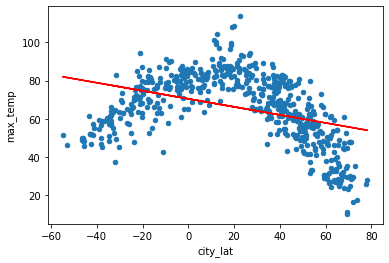

In [21]:
clean_city_data.plot(kind='scatter', x='city_lat', y='max_temp')
plt.plot(x_, y_predict, color='r')
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression